### Execução Sequencial

In [1]:
# Importações de bibliotecas
import time
import numpy as np
from PIL import Image, ImageChops
from concurrent.futures import ProcessPoolExecutor

In [2]:
# Importação das imagens
image_fullhd = Image.open('images/fullhd.jpg')
image_2k = Image.open('images/2k.jpg')
image_4k = Image.open('images/4k.jpg')
image_8k = Image.open('images/8k.jpg')

In [3]:
# Função que aplica um filtro de escala de cinza em uma imagem
def grayscale_filter(image_array):
	grayscale_array = np.zeros((image_array.shape[0], image_array.shape[1]), dtype=np.uint8)
	
	# Aplicação do filtro de escala de cinza
	for y in range(image_array.shape[0]):
		for x in range(image_array.shape[1]):
			r, g, b = image_array[y, x]
			gray = int(0.21 * r + 0.72 * g + 0.07 * b)
			grayscale_array[y, x] = gray
	
	# Conversão do array de pixels para imagem
	grayscale_image = Image.fromarray(grayscale_array)
	
	return grayscale_image

In [4]:
# Função que aplica um filtro de negativo em uma imagem
def negative_filter(image_array):
	inverted_array = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)
	
	# Aplicação do filtro de negativo
	for y in range(image_array.shape[0]):
		for x in range(image_array.shape[1]):
			inverted_array[y, x] = 255 - image_array[y, x]
	
	# Conversão do array de pixels para imagem
	inverted_image = Image.fromarray(inverted_array)
	
	return inverted_image

In [8]:
# Função que aplica filtro de forma sequencial
def apply_seq_filter(image, func):
	width, height = image.size
	image_array = np.array(image)

	# Avaliação do tempo de execução
	start = time.time()
	processed_image = func(image_array)
	end = time.time()

	# Impressão do tempo de execução
	print(f"Tempo de execução sequencial para imagem {width}x{height}: {end - start}s")
	return processed_image

In [9]:
# Função que aplica filtro de forma paralela
def apply_par_filter(image, func, threads):
	width, height = image.size

	# Divisão da imagem em regiões horizontais
	rows = threads
	width, height = image.size
	base_region_height = height // rows
	extra_height = height % rows

	# Criação de uma lista para armazenar as regiões divididas
	divided_images = []

	# Dividindo da imagem em regiões e armazenando na lista
	for row in range(rows):
		upper = row * base_region_height + min(row, extra_height)
		lower = (row + 1) * base_region_height + min(row + 1, extra_height)
		region = image.crop((0, upper, width, lower))
		divided_images.append(np.array(region))

	# Avaliação do tempo de execução paralelo
	start = time.time()
	with ProcessPoolExecutor(max_workers=threads) as executor:
			futures = [executor.submit(func, image_splited) for image_splited in divided_images]
	processed_images = [future.result() for future in futures]
	end = time.time()

	# Concatenação das regiões processadas
	processed_image = np.concatenate(processed_images, axis=0)
	processed_image = Image.fromarray(processed_image)

	# Impressão do tempo de execução
	print(f"Tempo de execução paralela para imagem {width}x{height} com {threads} threads: {end - start}s")
	return processed_image

### Aplicação das Funções

##### Filtro Negativo

In [10]:
# Aplicando filtros negativos em cada imagem de forma sequencial
print("Execução sequencial")
image_fullhd_negative_seq = apply_seq_filter(image_fullhd, negative_filter)

print('------------------')

# Aplicando filtros negativos em cada imagem de forma paralela
print("Execução paralela")
image_fullhd_negative_par = apply_par_filter(image_fullhd, negative_filter, 1)
image_fullhd_negative_par_2 = apply_par_filter(image_fullhd, negative_filter, 2)
image_fullhd_negative_par_4 = apply_par_filter(image_fullhd, negative_filter, 4)
image_fullhd_negative_par_8 = apply_par_filter(image_fullhd, negative_filter, 8)
image_fullhd_negative_par_12 = apply_par_filter(image_fullhd, negative_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 1920x1080: 3.0261642932891846s
Execução paralela
Tempo de execução paralela para imagem 1920x1080 com 1 threads: 3.0380921363830566s
Tempo de execução paralela para imagem 1920x1080 com 2 threads: 1.6684911251068115s
Tempo de execução paralela para imagem 1920x1080 com 4 threads: 0.8903062343597412s
Tempo de execução paralela para imagem 1920x1080 com 8 threads: 0.5802669525146484s
Tempo de execução paralela para imagem 1920x1080 com 12 threads: 0.5124175548553467s


In [11]:
print("Execução sequencial")
image_2k_negative_seq = apply_seq_filter(image_2k, negative_filter)

print('------------------')

print("Execução paralela")
image_2k_negative_par = apply_par_filter(image_2k, negative_filter, 1)
image_2k_negative_par_2 = apply_par_filter(image_2k, negative_filter, 2)
image_2k_negative_par_4 = apply_par_filter(image_2k, negative_filter, 4)
image_2k_negative_par_8 = apply_par_filter(image_2k, negative_filter, 8)
image_2k_negative_par_12 = apply_par_filter(image_2k, negative_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 2560x1440: 5.440199613571167s
------------------
Execução paralela
Tempo de execução paralela para imagem 2560x1440 com 1 threads: 5.465640068054199s
Tempo de execução paralela para imagem 2560x1440 com 2 threads: 2.8652546405792236s
Tempo de execução paralela para imagem 2560x1440 com 4 threads: 1.6624290943145752s
Tempo de execução paralela para imagem 2560x1440 com 8 threads: 1.0056684017181396s
Tempo de execução paralela para imagem 2560x1440 com 12 threads: 0.9221363067626953s


In [12]:
print("Execução sequencial")
image_4k_negative_seq = apply_seq_filter(image_4k, negative_filter)

print('------------------')

print("Execução paralela")
image_4k_negative_par = apply_par_filter(image_4k, negative_filter, 1)
image_4k_negative_par_2 = apply_par_filter(image_4k, negative_filter, 2)
image_4k_negative_par_4 = apply_par_filter(image_4k, negative_filter, 4)
image_4k_negative_par_8 = apply_par_filter(image_4k, negative_filter, 8)
image_4k_negative_par_12 = apply_par_filter(image_4k, negative_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 3840x2160: 12.223778009414673s
------------------
Execução paralela
Tempo de execução paralela para imagem 3840x2160 com 1 threads: 12.221718788146973s
Tempo de execução paralela para imagem 3840x2160 com 2 threads: 6.683157920837402s
Tempo de execução paralela para imagem 3840x2160 com 4 threads: 3.75482177734375s
Tempo de execução paralela para imagem 3840x2160 com 8 threads: 2.265040874481201s
Tempo de execução paralela para imagem 3840x2160 com 12 threads: 2.052349328994751s


In [13]:
print("Execução sequencial")
image_8k_negative_seq = apply_seq_filter(image_8k, negative_filter)

print('------------------')

print("Execução paralela")
image_8k_negative_par = apply_par_filter(image_8k, negative_filter, 1)
image_8k_negative_par_2 = apply_par_filter(image_8k, negative_filter, 2)
image_8k_negative_par_4 = apply_par_filter(image_8k, negative_filter, 4)
image_8k_negative_par_8 = apply_par_filter(image_8k, negative_filter, 8)
image_8k_negative_par_12 = apply_par_filter(image_8k, negative_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 7680x4320: 48.14291477203369s
------------------
Execução paralela
Tempo de execução paralela para imagem 7680x4320 com 1 threads: 49.803869009017944s
Tempo de execução paralela para imagem 7680x4320 com 2 threads: 26.30355191230774s
Tempo de execução paralela para imagem 7680x4320 com 4 threads: 14.325733661651611s
Tempo de execução paralela para imagem 7680x4320 com 8 threads: 9.45074462890625s
Tempo de execução paralela para imagem 7680x4320 com 12 threads: 8.161692142486572s


##### Filtro Escala de Cinza

In [19]:
# Aplicando filtros de escala de cinza em cada imagem de forma sequencial
print("Execução sequencial")
image_fullhd_grayscale_seq = apply_seq_filter(image_fullhd, grayscale_filter)

print('------------------')

# Aplicando filtros de escala de cinza em cada imagem de forma paralela
print("Execução paralela")
image_fullhd_grayscale_par = apply_par_filter(image_fullhd, grayscale_filter, 1)
image_fullhd_grayscale_par_2 = apply_par_filter(image_fullhd, grayscale_filter, 2)
image_fullhd_grayscale_par_4 = apply_par_filter(image_fullhd, grayscale_filter, 4)
image_fullhd_grayscale_par_8 = apply_par_filter(image_fullhd, grayscale_filter, 8)
image_fullhd_grayscale_par_12 = apply_par_filter(image_fullhd, grayscale_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 1920x1080: 11.85116958618164s
------------------
Execução paralela
Tempo de execução paralela para imagem 1920x1080 com 1 threads: 12.033822774887085s
Tempo de execução paralela para imagem 1920x1080 com 2 threads: 6.3451337814331055s
Tempo de execução paralela para imagem 1920x1080 com 4 threads: 3.499089241027832s
Tempo de execução paralela para imagem 1920x1080 com 8 threads: 2.44309139251709s
Tempo de execução paralela para imagem 1920x1080 com 12 threads: 2.5391488075256348s


In [20]:
# Aplicando filtros de escala de cinza em cada imagem de forma sequencial
print("Execução sequencial")
image_2k_grayscale_seq = apply_seq_filter(image_2k, grayscale_filter)

print('------------------')

# Aplicando filtros de escala de cinza em cada imagem de forma paralela
print("Execução paralela")
image_2k_grayscale_par = apply_par_filter(image_2k, grayscale_filter, 1)
image_2k_grayscale_par_2 = apply_par_filter(image_2k, grayscale_filter, 2)
image_2k_grayscale_par_4 = apply_par_filter(image_2k, grayscale_filter, 4)
image_2k_grayscale_par_8 = apply_par_filter(image_2k, grayscale_filter, 8)
image_2k_grayscale_par_12 = apply_par_filter(image_2k, grayscale_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 2560x1440: 21.184351444244385s
------------------
Execução paralela
Tempo de execução paralela para imagem 2560x1440 com 1 threads: 21.6961510181427s
Tempo de execução paralela para imagem 2560x1440 com 2 threads: 11.221287727355957s
Tempo de execução paralela para imagem 2560x1440 com 4 threads: 6.623650074005127s
Tempo de execução paralela para imagem 2560x1440 com 8 threads: 3.946357488632202s
Tempo de execução paralela para imagem 2560x1440 com 12 threads: 3.803114175796509s


In [21]:
# Aplicando filtros de escala de cinza em cada imagem de forma sequencial
print("Execução sequencial")
image_4k_grayscale_seq = apply_seq_filter(image_4k, grayscale_filter)

print('------------------')

# Aplicando filtros de escala de cinza em cada imagem de forma paralela
print("Execução paralela")
image_4k_grayscale_par = apply_par_filter(image_4k, grayscale_filter, 1)
image_4k_grayscale_par_2 = apply_par_filter(image_4k, grayscale_filter, 2)
image_4k_grayscale_par_4 = apply_par_filter(image_4k, grayscale_filter, 4)
image_4k_grayscale_par_8 = apply_par_filter(image_4k, grayscale_filter, 8)
image_4k_grayscale_par_12 = apply_par_filter(image_4k, grayscale_filter, 12)

Execução sequencial
Tempo de execução sequencial para imagem 3840x2160: 47.448421239852905s
------------------
Execução paralela
Tempo de execução paralela para imagem 3840x2160 com 1 threads: 47.43055295944214s
Tempo de execução paralela para imagem 3840x2160 com 2 threads: 25.479215621948242s
Tempo de execução paralela para imagem 3840x2160 com 4 threads: 14.064839601516724s
Tempo de execução paralela para imagem 3840x2160 com 8 threads: 8.676408529281616s
Tempo de execução paralela para imagem 3840x2160 com 12 threads: 7.8868207931518555s


In [22]:
# Aplicando filtros de escala de cinza em cada imagem de forma sequencial
print("Execução sequencial")
image_8k_grayscale_seq = apply_seq_filter(image_8k, grayscale_filter)

print('------------------')

# Aplicando filtros de escala de cinza em cada imagem de forma paralela
print("Execução paralela")
image_8k_grayscale_par = apply_par_filter(image_8k, grayscale_filter, 1)
image_8k_grayscale_par_2 = apply_par_filter(image_8k, grayscale_filter, 2)
image_8k_grayscale_par_4 = apply_par_filter(image_8k, grayscale_filter, 4)
image_8k_grayscale_par_8 = apply_par_filter(image_8k, grayscale_filter, 8)
image_8k_grayscale_par_12 = apply_par_filter(image_8k, grayscale_filter, 12)

Execução sequencial


Tempo de execução sequencial para imagem 7680x4320: 186.8820960521698s
------------------
Execução paralela
Tempo de execução paralela para imagem 7680x4320 com 1 threads: 187.35242700576782s
Tempo de execução paralela para imagem 7680x4320 com 2 threads: 96.20934081077576s
Tempo de execução paralela para imagem 7680x4320 com 4 threads: 55.02587270736694s
Tempo de execução paralela para imagem 7680x4320 com 8 threads: 35.19160509109497s
Tempo de execução paralela para imagem 7680x4320 com 12 threads: 31.98531174659729s


### Testes de Corretude

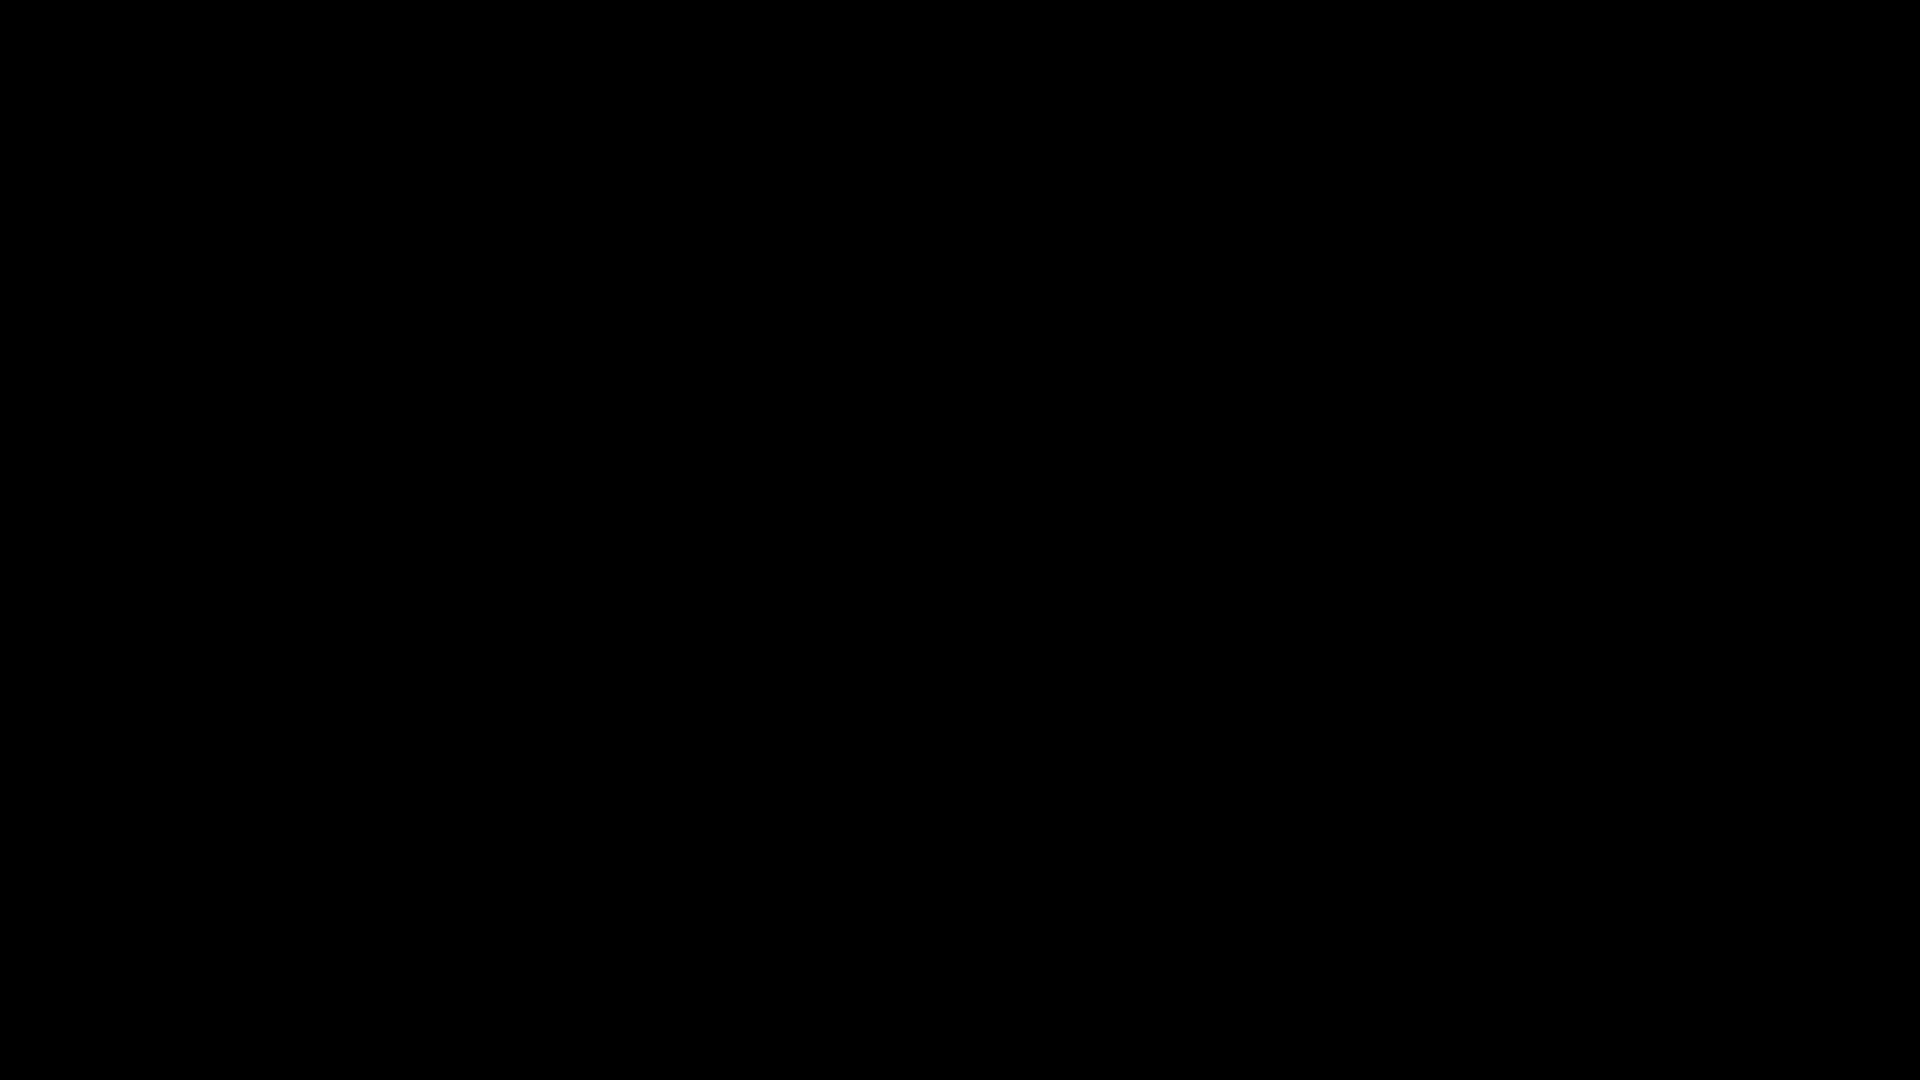

In [23]:
"""
O primeiro teste de corretude diz respeito à comparação entre a imagem processada de forma sequencial e a processada de forma concorrente.
Caso haja necessidade de comparar duas imagens, é possível utilizar a biblioteca PIL (Python Imaging Library) para realizar a comparação.
A comparação é feita através da diferença entre as imagens, onde a imagem resultante é uma imagem preta com as diferenças entre as imagens originais.
Se as imagens forem iguais, a imagem resultante será totalmente preta.
Porém, se houver diferenças, a imagem resultante terá as diferenças em branco.
"""

# Exemplo de uso da biblioteca PIL para comparar duas imagens processadas
diff = ImageChops.difference(image_fullhd_grayscale_seq, image_fullhd_grayscale_par) 
diff.show()

In [24]:
"""
Outra forma de teste de corretude envolve a transformação das imagens processadas em arrays, seguida pela realização da diferença entre esses arrays. 
Esse método consiste em verificar se a soma dos elementos do array resultante é maior do que 0. 
Essa abordagem é útil para identificar se há diferenças significativas entre as imagens processadas, indo além da simples verificação de igualdade. 
Ao calcular a diferença entre os arrays e somar seus elementos, podemos quantificar o grau de variação entre as imagens, fornecendo uma métrica numérica para avaliar a corretude do processamento.
"""

# Transformação das imagens processadas em array
negative_seq_array = np.array(image_fullhd_grayscale_seq)
negative_par_array = np.array(image_fullhd_grayscale_par)

# Cálculo da diferença entre as matrizes
result_array = negative_seq_array - negative_par_array

# Verificação da diferença entre as imagens de forma numérica
print(np.sum(result_array))

0
